# Part II - (Ford GoBike System Data - Explanation)
## by Aristide FOTSO

 
## Dataset Overview

> There are 175,147 items in the dataset with 8 features (trip_duration(s), member_birth_year, time, date, user_type, member_gender, AgeGroup, bike_share_for_all_trip). Most variables are float and integer in nature, but the variables AgeGroup, member_gender, bike_share_for_all_trip, and user_type are ordered factor variables with the following levels.

> (worst) ——> (best)
> * bike_share_for_all_trip: No, Yes
> * user_type: Customer, Subscriber
> * member_gender: Other, Female, Male
> * AgeGroup: very_young, young, midlife, old, very_old

In [30]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [31]:
# load in the dataset into a pandas dataframe
bike_trip_df = pd.read_csv('cleaned_bike_trip_df.csv')
time_trip_df = pd.read_csv('cleaned_time_trip_df.csv')

In [32]:
bike_trip_df.head()

,member_birth_year,member_gender,user_type,AgeGroup,bike_share_for_all_trip,trip_duration(s),AgeGroup_cat
0,1984,Male,Customer,midlife,No,52185.830,2
1,1972,Male,Customer,midlife,No,61854.928,2
2,1993,Male,Subscriber,old,No,506.193,3
3,1998,Male,Subscriber,old,No,259.032,3
4,1977,Male,Subscriber,midlife,No,386.978,2


In [33]:
# Data wrangling, delete bike_share_for_all_trip column
bike_trip_df.drop(columns=['bike_share_for_all_trip'], inplace=True)

In [34]:
bike_trip_df.head()

,member_birth_year,member_gender,user_type,AgeGroup,trip_duration(s),AgeGroup_cat
0,1984,Male,Customer,midlife,52185.830,2
1,1972,Male,Customer,midlife,61854.928,2
2,1993,Male,Subscriber,old,506.193,3
3,1998,Male,Subscriber,old,259.032,3
4,1977,Male,Subscriber,midlife,386.978,2


In [35]:
time_trip_df.head()

,user_type,AgeGroup,date,hour,minute,second,AgeGroup_cat,day_of_week
0,Subscriber,old,2019-02-01,0,0,20.636,3,Friday
1,Subscriber,old,2019-02-17,0,40,35.986,3,Sunday
2,Subscriber,midlife,2019-02-17,0,30,3.687,2,Sunday
3,Subscriber,midlife,2019-02-17,0,30,45.421,2,Sunday
4,Subscriber,old,2019-02-17,0,28,27.173,3,Sunday


## Distribution of trip duration

> trip duration in the dataset take on a very large range of values, from about 0 𝑎𝑡 𝑡ℎ𝑒 𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜 𝑎𝑏𝑜𝑢𝑡 85,000 at the highest. Plotted on a logarithmic scale, the distribution of trip duration takes on a unimodal shape.

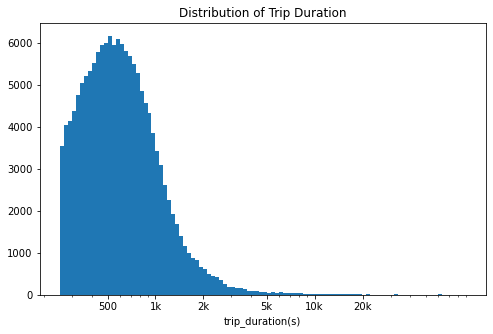

In [36]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(bike_trip_df['trip_duration(s)'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trip_df, x = 'trip_duration(s)', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('trip_duration(s)')
plt.title('Distribution of Trip Duration')
plt.show()

## Distribution of Number of Trips Per Day of Week

> In this distribution, we can see that there are more trips on Tuesday and Thursday

In [37]:
time_trip_df['date'] = time_trip_df['date'].astype('datetime64[ns]')

In [38]:
time_trip_df.dtypes

user_type               object
AgeGroup                object
date            datetime64[ns]
hour                     int64
minute                   int64
second                 float64
AgeGroup_cat             int64
day_of_week             object
dtype: object

In [39]:
dayTrip = time_trip_df.date.dt.day_name().value_counts()
indexL = dayTrip.index
valuesL = dayTrip.values
frame = { 'weekDay': indexL, 'countTrip': valuesL }
dayTrip_df = pd.DataFrame(frame)

In [40]:
weekDays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_day = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = weekDays)
dayTrip_df['weekDay'] = dayTrip_df['weekDay'].astype(ordered_day)
dayTrip_df.sort_values("weekDay", axis = 0, ascending = True,
                 inplace = True)

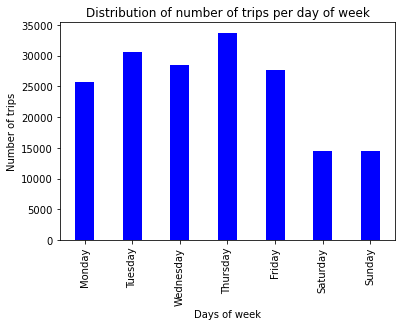

In [41]:
plt.bar(dayTrip_df['weekDay'], dayTrip_df['countTrip'], color ='blue',
        width = 0.4)
plt.xticks(rotation=90)
plt.xlabel("Days of week")
plt.ylabel("Number of trips")
plt.title("Distribution of number of trips per day of week");

## Distribution of Number of Trips per Hour of day

> In this distribution, we can see that there are more trips on periods: from **07:00 am to 09:00 am** and from **03:00 pm to 05:00 pm**



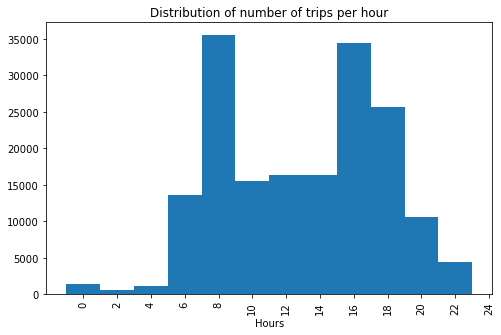

In [42]:
binsize = 2
bins = np.arange(0, time_trip_df['hour'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = time_trip_df, x = 'hour', bins = bins, align='left')
plt.xticks(bins, bins, rotation = 90)
plt.xlabel('Hours')
plt.title("Distribution of number of trips per hour")
plt.show()

## Relationship between number of trips, days of week, age group, user type
> We can see that users in old and midlife age groups made more trips
, and on Tuesday and Thursday

In [43]:
def convertPropCat(list, feature, df):
    ordered_list = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = list)
    df[f"{feature}"] = df[f"{feature}"].astype(ordered_list)

In [44]:
AgeGroups = ['very_young', 'young', 'midlife', 'old', 'very_old']
convertPropCat(AgeGroups, 'AgeGroup', time_trip_df)

In [45]:
time_trip_df.dtypes

user_type               object
AgeGroup              category
date            datetime64[ns]
hour                     int64
minute                   int64
second                 float64
AgeGroup_cat             int64
day_of_week             object
dtype: object

In [53]:
time_trip_df['hour'] = time_trip_df['hour'].astype(int)
def facetGrid(feature, *argv):
    g = sb.FacetGrid(data = time_trip_df, col = 'AgeGroup', row = 'user_type', height = 2.5,
                margin_titles = True)
    if (len(argv) != 0):
        #print(len(argv))
        binwidth=argv[0]
        binmax=argv[1]
        g.map_dataframe(sb.histplot, x=f"{feature}", binwidth=binwidth, binrange=(0, binmax))
        g.set(xticks=argv[2])
        g.set_xticklabels(argv[2], rotation=90)
        g.fig.subplots_adjust(top=0.8) # adjust the Figure in g
        g.fig.suptitle('Distribution of number of trips among hours of day, age group and user type')
    else:
        g.map_dataframe(sb.histplot, x=f"{feature}")
        g.set_xticklabels(rotation=90)
        g.fig.subplots_adjust(top=0.8) # adjust the Figure in g
        g.fig.suptitle('Distribution of number of trips among days of week, age group and user type')
    g.set_ylabels('Number of trips');

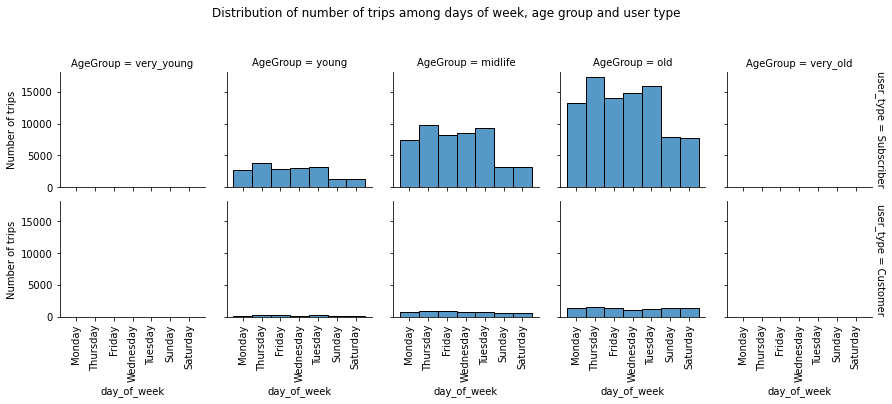

In [54]:
facetGrid('day_of_week');

## Relationship between number of trips, hours of day,  age group, user type

> We can see that users in old and midlife age groups made more trips, and between 08:00 am and 10:00 am, 04:00 pm and 06:00 pm

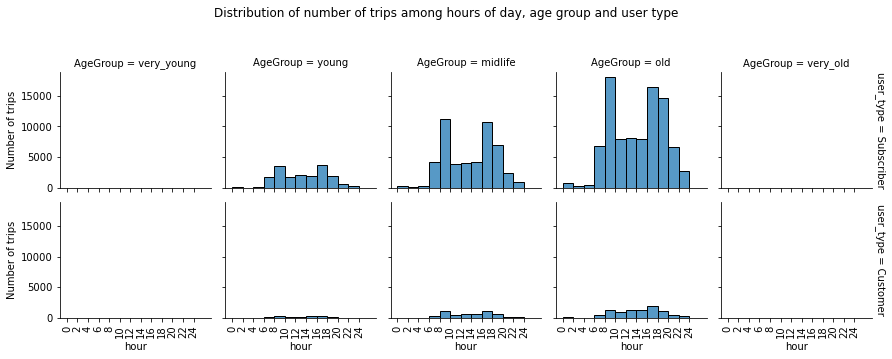

In [55]:
binsize = 2
bins = np.arange(0, time_trip_df['hour'].max()+binsize, binsize)
facetGrid('hour', binsize, time_trip_df['hour'].max()+binsize, bins);

## Relationship between trip duration, age group and gender of user

We can see that users in old and midlife age groups spent more time in trips than other age groups no matter gender of user

In [49]:
AgeGroups = ['very_young', 'young', 'midlife', 'old', 'very_old']
convertPropCat(AgeGroups, 'AgeGroup', bike_trip_df)
genders = ['Other', 'Female', 'Male']
convertPropCat(genders, 'member_gender', bike_trip_df)

In [50]:
bike_trip_df.dtypes

member_birth_year       int64
member_gender        category
user_type              object
AgeGroup             category
trip_duration(s)      float64
AgeGroup_cat            int64
dtype: object

In [51]:
bike_trip_df.head()

,member_birth_year,member_gender,user_type,AgeGroup,trip_duration(s),AgeGroup_cat
0,1984,Male,Customer,midlife,52185.830,2
1,1972,Male,Customer,midlife,61854.928,2
2,1993,Male,Subscriber,old,506.193,3
3,1998,Male,Subscriber,old,259.032,3
4,1977,Male,Subscriber,midlife,386.978,2


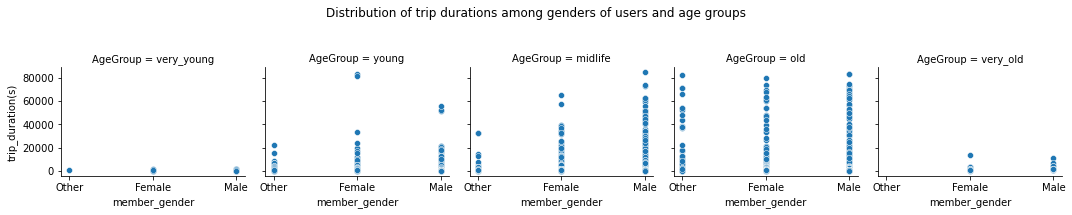

In [52]:
g = sb.FacetGrid(bike_trip_df, col="AgeGroup")
g.map(sb.scatterplot, "member_gender", "trip_duration(s)")
g.fig.subplots_adjust(top=0.7) # adjust the Figure in g
g.fig.suptitle('Distribution of trip durations among genders of users and age groups');